In [1]:
!pip install pillow


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
from PIL import Image # Abrir archivos de imágenes
import matplotlib.pyplot as plt

In [3]:
imagen = Image.open("data/perrito.jpeg")

In [4]:
imagen = np.array(imagen)

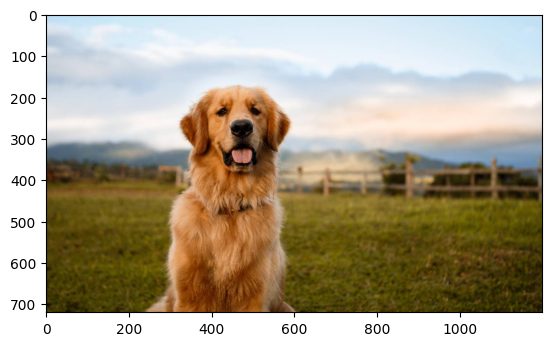

In [5]:
plt.imshow(imagen)

In [6]:
imagen.shape

(720, 1200, 3)

In [7]:
imagen

array([[[190, 221, 242],
        [190, 221, 242],
        [190, 221, 242],
        ...,
        [211, 227, 240],
        [211, 227, 240],
        [211, 227, 240]],

       [[190, 221, 242],
        [190, 221, 242],
        [190, 221, 242],
        ...,
        [210, 226, 239],
        [211, 227, 240],
        [211, 227, 240]],

       [[190, 221, 242],
        [190, 221, 242],
        [190, 221, 242],
        ...,
        [209, 227, 241],
        [209, 227, 241],
        [209, 227, 241]],

       ...,

       [[ 62,  50,   0],
        [ 62,  50,   0],
        [ 66,  54,   2],
        ...,
        [ 67,  60,  18],
        [ 63,  56,  12],
        [ 55,  48,   4]],

       [[ 59,  47,   0],
        [ 59,  47,   0],
        [ 63,  51,   0],
        ...,
        [ 61,  54,  12],
        [ 59,  52,   8],
        [ 52,  45,   0]],

       [[ 55,  43,   0],
        [ 55,  43,   0],
        [ 59,  47,   0],
        ...,
        [ 53,  46,   4],
        [ 50,  43,   0],
        [ 44,  37,   0]]

In [8]:
alto, ancho, _ = imagen.shape

In [10]:
# Creo una matriz "vacía" para empezar a manipular la imagen
imagen_verde = np.zeros((alto, ancho, 3), dtype=np.uint8)

In [11]:
for y in range(alto):
    for x in range(ancho):
        imagen_verde[y, x] = (0, 255, 0)

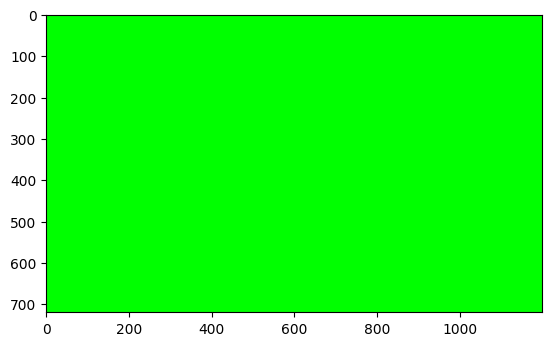

In [12]:
plt.imshow(imagen_verde)

In [17]:
# Modificar sólo una cantidad de pixeles
for y in range(200, 400):
    for x in range(350, 600):
        imagen[y, x] = (0, 0, 255)

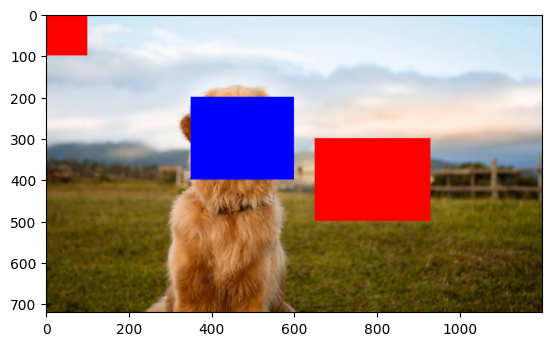

In [18]:
plt.imshow(imagen)

In [20]:
imagen_perrito = Image.open("data/perrito.jpeg")

In [22]:
imagen_perrito = np.array(imagen_perrito)

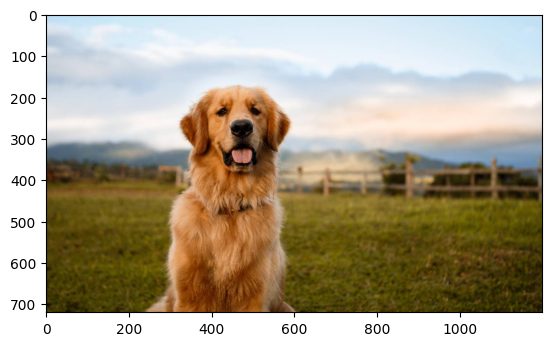

In [23]:
plt.imshow(imagen_perrito)

In [24]:
# Convertir a escala de grises
for y in range(180, 720):
    for x in range(220, 600):
        rojo = imagen_perrito[y, x][0]
        verde = imagen_perrito[y, x][1]
        azul = imagen_perrito[y, x][2]

        gris = (rojo + verde + azul) / 3

        # Calcular el promedio de los colores
        # para obtener el valor de gris
        imagen_perrito[y, x] = (gris, gris, gris)
        

/var/folders/tt/5swmzhn10p3c6xwhpwvkw6w40000gn/T/ipykernel_2142/4000134247.py:8: RuntimeWarning: overflow encountered in scalar add
  gris = (rojo + verde + azul) / 3


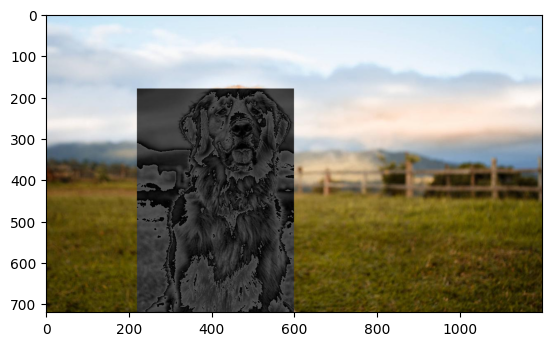

In [25]:
plt.imshow(imagen_perrito)

## Máquina de soporte vectorial

In [28]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [29]:
datos = datasets.load_digits()

In [30]:
X = datos.data

In [31]:
y = datos.target

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [33]:
# Escalar las características para asegurarnos que 
# todas estén en la misma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
svm = SVC(kernel='linear', random_state=42)

In [35]:
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [36]:
y_pred = svm.predict(X_test)

In [37]:
accuracy = accuracy_score(y_test, y_pred)

In [38]:
accuracy

0.975